In [271]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
from sklearn.model_selection import train_test_split

import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix, classification_report

In [272]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [273]:
train_df="/kaggle/input/surface-crack/train"
test_df="/kaggle/input/surface-crack/test"
valid_df="/kaggle/input/surface-crack/valid"

In [274]:
train_data = train_gen.flow_from_directory(
    train_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,

 
)

val_data =train_gen.flow_from_directory(
    valid_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True

   

)

test_data = train_gen.flow_from_directory(
    test_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,

    
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [275]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop, Adagrad

from keras.layers import BatchNormalization

In [276]:
 def random_invert_img(x, p=0.6):
    if tf.random.uniform([]) < p:
        x = (255 - x)
    else:
        x
    return x
 def random_inv(factor = 0.65):
    return tf.keras.layers.Lambda(lambda x:random_invert_img(x, factor)) 

In [277]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)


In [278]:
 initializer = tf.keras.initializers.HeUniform()

In [279]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x=tf.keras.layers.RandomContrast(0.2,0.4)
x=tf.keras.layers.RandomCrop(60,60)
x=tf.keras.layers.RandomRotation(0.2)
x=tf.keras.layers.RandomFlip("horizontal_and_vertical")
x=tf.keras.layers.RandomHeight(0.3)
x=tf.keras.layers.RandomWidth(0.1)
x=tf.keras.layers.RandomWidth(0.1)
x=tf.keras.layers.RandomZoom(0.1)
x=tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1)



x=random_inv()





x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)


outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 13, 128)       0  

In [280]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [281]:
filepath="we111ights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', patience=6,restore_best_weights=True)
callbacks_list = [checkpoint, es]

In [282]:


history = model.fit(train_data,validation_data=val_data,epochs = 200,callbacks=callbacks_list ,verbose=1,steps_per_epoch=len(train_data),
                           validation_steps=len(val_data))

Epoch 1/200
19/19 [==============================] - 3s 94ms/step - loss: 0.7499 - accuracy: 0.5167 - val_loss: 0.6890 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.68897, saving model to we111ights.best.hdf5
Epoch 2/200
19/19 [==============================] - 2s 92ms/step - loss: 0.7156 - accuracy: 0.5533 - val_loss: 0.6625 - val_accuracy: 0.7750

Epoch 00002: val_loss improved from 0.68897 to 0.66254, saving model to we111ights.best.hdf5
Epoch 3/200
19/19 [==============================] - 2s 82ms/step - loss: 0.5539 - accuracy: 0.7083 - val_loss: 0.5597 - val_accuracy: 0.6150

Epoch 00003: val_loss improved from 0.66254 to 0.55970, saving model to we111ights.best.hdf5
Epoch 4/200
19/19 [==============================] - 2s 80ms/step - loss: 0.4101 - accuracy: 0.8433 - val_loss: 0.5295 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 0.55970 to 0.52954, saving model to we111ights.best.hdf5
Epoch 5/200
19/19 [==============================] - 2s 97ms

In [283]:
fig = px.line( 
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
)

fig.show()

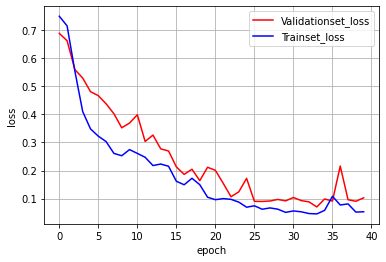

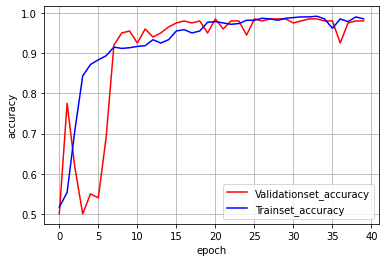

In [284]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, c = 'red', markersize = 3,label = 'Validationset_loss')
plt.plot(x_len, y_loss, c = 'blue', markersize = 3,label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, c = 'red', markersize = 3,label = 'Validationset_accuracy')
plt.plot(x_len, y_acc, c = 'blue', markersize = 3,label = 'Trainset_accuracy')
plt.legend(loc = 'lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [285]:
def evaluate_model(model, val_data):
    
    results = model.evaluate(val_data, verbose=0)
    loss = results[0]
    acc = results[1]
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
   
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    print("Classification Report:\n----------------------\n", clr)
                                                                        



**classifcation report for Test data**

In [286]:
evaluate_model(model, test_data)

    Test Loss: 0.18445
Test Accuracy: 95.00%
Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.91      1.00      0.95       100
    POSITIVE       1.00      0.90      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



**classifcation report for validation data**

In [287]:
evaluate_model(model, val_data)

    Test Loss: 0.07018
Test Accuracy: 98.50%
Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.91      1.00      0.95       100
    POSITIVE       1.00      0.90      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [288]:
from sklearn.metrics import confusion_matrix

In [289]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



True Negatives:  100
False Positives:  0
False Negatives:  10
True Positives:  90


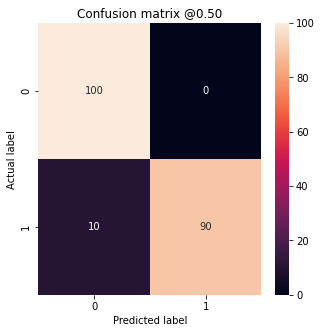

In [290]:
plot_cm(test_data.labels,  np.squeeze((model.predict(test_data) >= 0.5).astype(np.int)))
